### 1. Keras Sequential model:

In [1]:
"import librairies"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

#### 1.1. Read in the data and explore:

In [2]:
# Read.
df=pd.read_csv('/Users/alfahwun/Downloads/data_boston.csv')

In [3]:
# View.
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = df.drop('PRICE',axis=1)
Y = df['PRICE']

In [5]:
# Scale the X data use min max scaller and fit transform.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [6]:
X = scaler.fit_transform(X)

In [9]:
# Spit the data into training and testing.
X_train ,X_test , Y_train ,Y_test = train_test_split(X,Y,train_size=0.8,random_state=123)
X_model, X_valid, Y_model, Y_valid = train_test_split(X_train, Y_train, test_size = 0.2,random_state=123)

#### 1.2. Define a Sequential model:

In [10]:
from keras.layers import Dense


In [11]:
n_vars = X.shape[1]

In [12]:
# Add layers on a Sequential object.
my_model1 = Sequential()
my_model1.add(Dense(input_dim = n_vars, units = 1, activation="linear"))
#my_model1.add(Dense(units = 1, activation="linear"))# Add a output layer for linear regression.

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-04 14:53:14.068381: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-04 14:53:14.069911: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# Summary of the model.
my_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Define the hyperparameters and optimizer:

In [14]:
# Hyperparameters.
n_epochs = 500
batch_size = 8
learn_rate = 0.001

In [15]:
# Define the optimizer and then compile.
from tensorflow.keras.optimizers import Adam
my_optimizer=Adam(learning_rate=learn_rate)
my_model1.compile(optimizer=my_optimizer, loss="mae",metrics='mse')


#### 1.4. Train the model and visualize the history:

In [16]:
# Train the model.
# verbose = 0 means no output. verbose = 1 to view the epochs.

history_model = my_model1.fit(X_model,Y_model, validation_data=(X_valid, Y_valid),epochs=n_epochs, batch_size=batch_size,verbose=1)

Epoch 1/500


2023-03-04 14:53:35.055887: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-04 14:53:35.286216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


41/41 [==============================] - 1s 12ms/step - loss: 22.4422 - mse: 581.2283 - val_loss: 23.7203 - val_mse: 671.1275
Epoch 2/500
 5/41 [==>...........................] - ETA: 0s - loss: 22.8367 - mse: 629.0405

2023-03-04 14:53:35.872666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


41/41 [==============================] - 0s 9ms/step - loss: 22.2017 - mse: 570.9275 - val_loss: 23.4793 - val_mse: 660.2049
Epoch 3/500
41/41 [==============================] - 0s 7ms/step - loss: 21.9603 - mse: 560.6880 - val_loss: 23.2394 - val_mse: 649.4429
Epoch 4/500
41/41 [==============================] - 0s 7ms/step - loss: 21.7192 - mse: 550.5921 - val_loss: 22.9989 - val_mse: 638.7736
Epoch 5/500
41/41 [==============================] - 0s 8ms/step - loss: 21.4790 - mse: 540.6468 - val_loss: 22.7572 - val_mse: 628.1836
Epoch 6/500
41/41 [==============================] - 0s 9ms/step - loss: 21.2376 - mse: 530.9520 - val_loss: 22.5175 - val_mse: 617.7852
Epoch 7/500
41/41 [==============================] - 0s 7ms/step - loss: 20.9969 - mse: 521.2191 - val_loss: 22.2774 - val_mse: 607.4973
Epoch 8/500
41/41 [==============================] - 0s 9ms/step - loss: 20.7565 - mse: 511.5328 - val_loss: 22.0376 - val_mse: 597.3278
Epoch 9/500
41/41 [==============================] - 

In [17]:
history_model.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [18]:
# View the keys.
for x in history_model.history.keys():
    print(f'{x} : {min(history_model.history[x])}')

loss : 4.471295356750488
mse : 45.42266082763672
val_loss : 5.5392842292785645
val_mse : 76.20233917236328


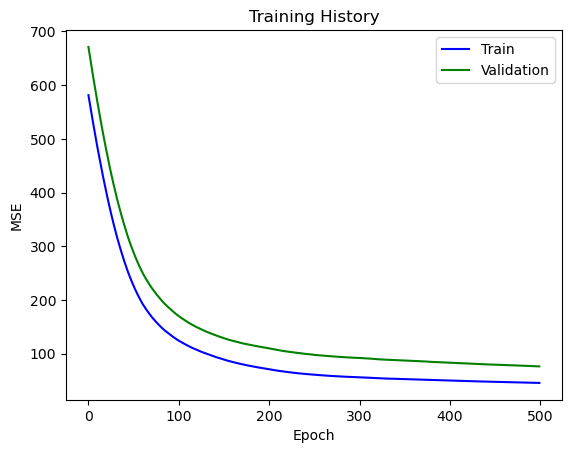

In [25]:
# Visualize the training history. 
n_skip = 0        # Skip the first few steps.
plt.plot(history_model.history['mse'][n_skip:], c="b")
plt.plot(history_model.history['val_mse'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

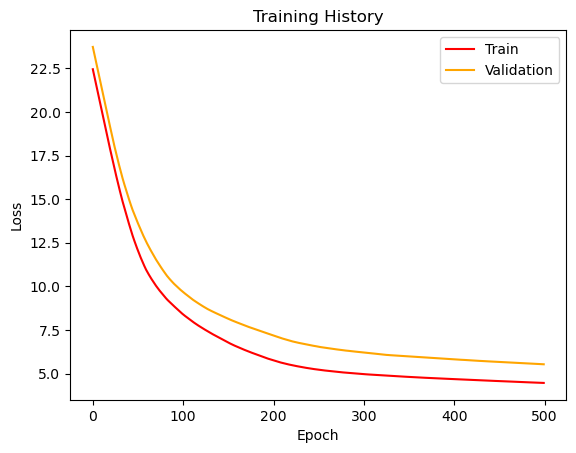

In [26]:
plt.plot(history_model.history['loss'][n_skip:], c="r")
plt.plot(history_model.history['val_loss'][n_skip:], c="orange")
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### 1.5. Testing: 

In [83]:
# Predict and test using a formula.
Y_pred = my_model1.predict(X_test)

4/4 [==============================] - 0s 3ms/step


2023-03-04 12:50:34.705798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [84]:
MAE = my_model1.evaluate(X_test, Y_test, verbose=0)


In [85]:
print(MAE)

[67.12413024902344, 5.687297344207764]


In [86]:
# Use the evaluate() method.
MAE = my_model1.evaluate(X_test, Y_test, verbose=0)[1]
print("Test MAE : {}".format(np.round(MAE,3)))

Test MAE : 5.687
